# Profit and Loss Statement financial analysis with Python

In [1]:
# importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the Dataset

In [2]:
# Loading the dataset
general_ledger = pd.read_csv("general_ledger_bottle_water_company.csv")

# preview of top 5 rows
general_ledger.head()

,Date,Branch,Account Category,Account Name,Amount
0,2020-01-01,Delta,Other Expenses,Interest Expense,-36651
1,2020-01-01,Rivers,Revenue,Sales Return,-92185
2,2020-01-01,Akwa Ibom,Cost of Goods Sold,Cost of Sales,-457439
3,2020-01-01,Cross River,Cost of Goods Sold,Cost of Sales,-600299
4,2020-01-01,Cross River,Depreciation and Amortization,Amortization of Intangible Assets,-12196


### Data Cleaning

##### Missing Values

In [3]:
# Lets check if our data has missing values
general_ledger.isnull().sum()

Date                0
Branch              0
Account Category    0
Account Name        0
Amount              0
dtype: int64

##### DataTypes

In [4]:
general_ledger.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              40000 non-null  object
 1   Branch            40000 non-null  object
 2   Account Category  40000 non-null  object
 3   Account Name      40000 non-null  object
 4   Amount            40000 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.5+ MB


In [5]:
# Lets start by changing the date into a datetime datatype
general_ledger["Date"] = pd.to_datetime(general_ledger["Date"])

### Feature Engineering

In [6]:
# adding a column for Month and Year
general_ledger["Month"] = general_ledger["Date"].dt.strftime("%B")

general_ledger["Year"] = general_ledger["Date"].dt.year

# Lets make the datatype of year to be an object
general_ledger["Year"] = general_ledger["Year"].astype(str)

In [7]:
# Let's also add another category to distinguish between expenses and revenue
general_ledger["Category"] = np.where(general_ledger["Account Category"].isin(["Revenue","Other Income"]), "Revenue", "Expenses")

In [8]:
general_ledger.head()

,Date,Branch,Account Category,Account Name,Amount,Month,Year,Category
0,2020-01-01,Delta,Other Expenses,Interest Expense,-36651,January,2020,Expenses
1,2020-01-01,Rivers,Revenue,Sales Return,-92185,January,2020,Revenue
2,2020-01-01,Akwa Ibom,Cost of Goods Sold,Cost of Sales,-457439,January,2020,Expenses
3,2020-01-01,Cross River,Cost of Goods Sold,Cost of Sales,-600299,January,2020,Expenses
4,2020-01-01,Cross River,Depreciation and Amortization,Amortization of Intangible Assets,-12196,January,2020,Expenses


### Inconsistent Values

In [9]:
# Getting the absolute value for the Amount Column
general_ledger["Amount"] = general_ledger["Amount"].abs()

In [10]:
general_ledger.head()

,Date,Branch,Account Category,Account Name,Amount,Month,Year,Category
0,2020-01-01,Delta,Other Expenses,Interest Expense,36651,January,2020,Expenses
1,2020-01-01,Rivers,Revenue,Sales Return,92185,January,2020,Revenue
2,2020-01-01,Akwa Ibom,Cost of Goods Sold,Cost of Sales,457439,January,2020,Expenses
3,2020-01-01,Cross River,Cost of Goods Sold,Cost of Sales,600299,January,2020,Expenses
4,2020-01-01,Cross River,Depreciation and Amortization,Amortization of Intangible Assets,12196,January,2020,Expenses


### Exploratory Data Analysis

##### Total Revenue for Each Branch

In [11]:
# creating a filter to get only columns with the category of revenue
total_revenue_branch = general_ledger[general_ledger["Category"] == "Revenue"]

# Extracting the columns that I need
total_revenue_branch = total_revenue_branch[["Branch", "Amount", "Category"]]

# Grouping the dataset by branch to get the total revenue for each branch
total_revenue_branch = total_revenue_branch.groupby(["Branch", "Category"]).sum().reset_index().sort_values("Amount", ascending = False)

# a preview of the output
total_revenue_branch.head(10)

,Branch,Category,Amount
0,Akwa Ibom,Revenue,1725212274
5,Rivers,Revenue,1657555837
2,Cross River,Revenue,1622705919
1,Bayelsa,Revenue,1550773882
4,Edo,Revenue,1546985038
3,Delta,Revenue,1538668083


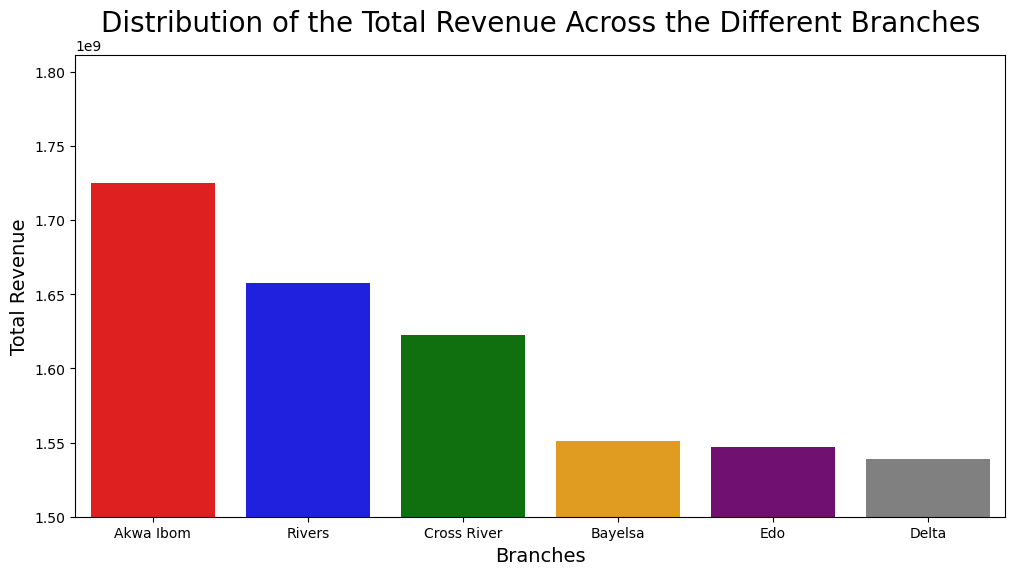

In [12]:
# Visualization
plt.figure(figsize = (12, 6))
sns.barplot(x = total_revenue_branch["Branch"], y =total_revenue_branch["Amount"], hue = total_revenue_branch["Branch"], palette = ["Red", "blue", "green", "orange", "purple", "gray"])
plt.title("Distribution of the Total Revenue Across the Different Branches", fontsize = 20)
plt.xlabel("Branches", fontsize = 14)
plt.ylabel("Total Revenue", fontsize = 14)
plt.ylim(1500000000)
plt.show()

##### The Total Revenue over Years for each branch

In [13]:
# creating a filter to get only columns with the category of revenue
total_revenue_branch_year = general_ledger[general_ledger["Category"] == "Revenue"]

# Extracting the columns that I need
total_revenue_branch_year = total_revenue_branch_year[["Branch", "Amount", "Year", "Category"]]

# Grouping the dataset by branch and year to get the total revenue for each branch
total_revenue_branch_year = total_revenue_branch_year.groupby(["Branch", "Year", "Category"]).sum().reset_index().sort_values("Year", ascending = True)

# a preview of the output
total_revenue_branch_year.head(10)

,Branch,Year,Category,Amount
0,Akwa Ibom,2020,Revenue,450254523
16,Edo,2020,Revenue,384949741
12,Delta,2020,Revenue,404236765
4,Bayelsa,2020,Revenue,400516930
8,Cross River,2020,Revenue,408446507
20,Rivers,2020,Revenue,420936826
13,Delta,2021,Revenue,381377834
17,Edo,2021,Revenue,343167397
9,Cross River,2021,Revenue,423255484
5,Bayelsa,2021,Revenue,378733475


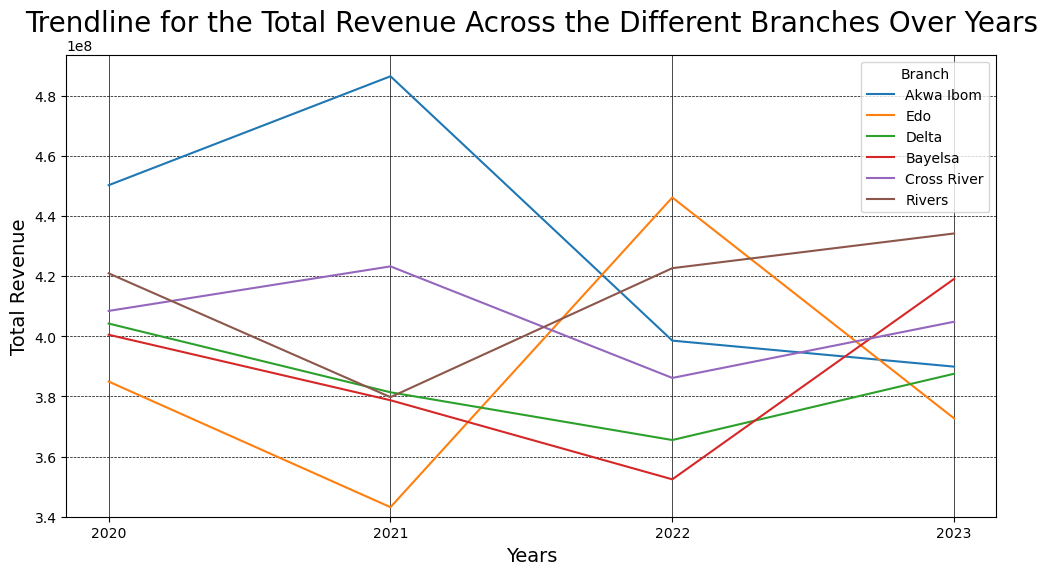

In [53]:
# Visualization
plt.figure(figsize = (12, 6))
sns.lineplot(x = total_revenue_branch_year["Year"], y =total_revenue_branch_year["Amount"], hue = total_revenue_branch_year["Branch"])
plt.title("Trendline for the Total Revenue Across the Different Branches Over Years", fontsize = 20)
plt.xlabel("Years", fontsize = 14)
plt.ylabel("Total Revenue", fontsize = 14)
plt.ylim(340000000)
plt.grid(axis = "y", linewidth = "0.5", linestyle= "--", color="black")
plt.grid(axis = "x", linewidth = "0.5", color = "black")
plt.show()

##### Total Expenses for Each Branch

In [15]:
# Creating a filter to only get the expenses
total_expenses_branch = general_ledger[general_ledger["Category"] == "Expenses"]

# Extracting the only columns needed
total_expenses_branch  = total_expenses_branch[["Branch", "Amount", "Category"]]

# grouping the dataset by Branch
total_expenses_branch = total_expenses_branch.groupby(["Branch", "Category"]).sum().reset_index().sort_values("Amount", ascending = False)

# A preview of the output
total_expenses_branch.head(10)

,Branch,Category,Amount
3,Delta,Expenses,844501623
2,Cross River,Expenses,814925365
4,Edo,Expenses,793114552
0,Akwa Ibom,Expenses,785557874
1,Bayelsa,Expenses,768414101
5,Rivers,Expenses,758674319


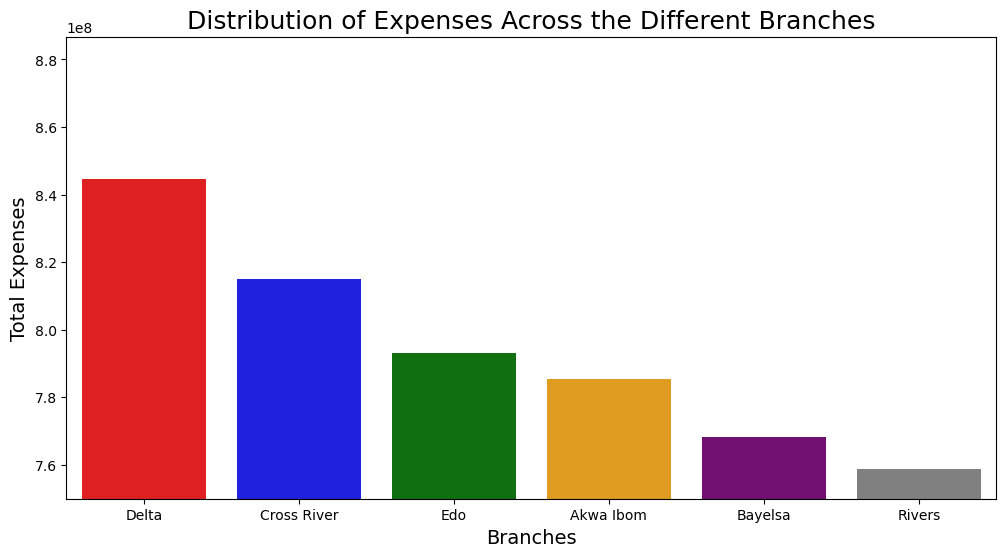

In [16]:
# Visualization
plt.figure(figsize = (12, 6))
sns.barplot(x= total_expenses_branch["Branch"], y = total_expenses_branch["Amount"], hue= total_expenses_branch["Branch"], palette =["Red", "blue", "green", "orange", "purple", "gray"])
plt.title("Distribution of Expenses Across the Different Branches", fontsize = 18)
plt.xlabel("Branches", fontsize = 14)
plt.ylabel("Total Expenses", fontsize= 14)
plt.ylim(750000000)
plt.show()

##### Total Expenses across different Branches over Years

In [17]:
# Creating a filter to only get the expenses
total_expenses_branch_year = general_ledger[general_ledger["Category"] == "Expenses"]

# Extracting the only columns needed
total_expenses_branch_year  = total_expenses_branch_year[["Branch", "Amount", "Year", "Category"]]

# grouping the dataset by Branch
total_expenses_branch_year = total_expenses_branch_year.groupby(["Branch", "Year", "Category"]).sum().reset_index().sort_values("Year", ascending = True)

# A preview of the output
total_expenses_branch_year.head(10)

,Branch,Year,Category,Amount
0,Akwa Ibom,2020,Expenses,204471589
16,Edo,2020,Expenses,207955257
12,Delta,2020,Expenses,219245093
4,Bayelsa,2020,Expenses,203506910
8,Cross River,2020,Expenses,198387823
20,Rivers,2020,Expenses,202673449
13,Delta,2021,Expenses,218129806
17,Edo,2021,Expenses,190360056
9,Cross River,2021,Expenses,212369715
5,Bayelsa,2021,Expenses,175669103


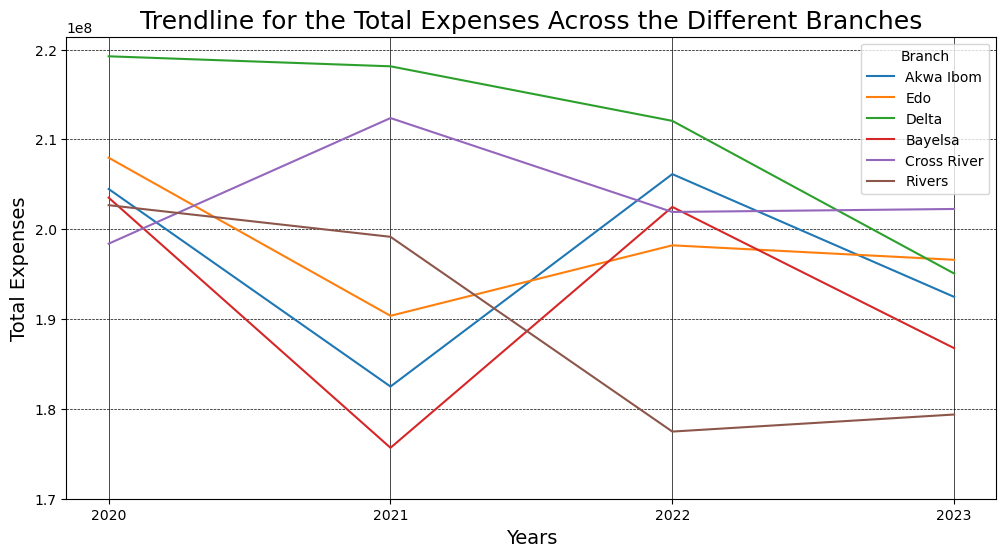

In [54]:
# Visualization
plt.figure(figsize = (12, 6))
sns.lineplot(x= total_expenses_branch_year["Year"], y = total_expenses_branch_year["Amount"], hue= total_expenses_branch_year["Branch"])
plt.title("Trendline for the Total Expenses Across the Different Branches", fontsize = 18)
plt.xlabel("Years", fontsize = 14)
plt.ylabel("Total Expenses", fontsize= 14)
plt.ylim(170000000)
plt.grid(axis = "y", linewidth = "0.5", linestyle= "--", color="black")
plt.grid(axis = "x", linewidth = "0.5", color = "black")
plt.show()

##### Net Profit for Each Branch

In [19]:
# Combining two dataframes
expenses_revenue_full = pd.merge(total_revenue_branch_year, total_expenses_branch_year, on= ["Year", "Branch"], suffixes = ("_Revenue", "_Expenses"))

# Let's calculate profit
expenses_revenue_full["Profits"] = expenses_revenue_full["Amount_Revenue"] - expenses_revenue_full["Amount_Expenses"]

# preview of the output
expenses_revenue_full.head(5)

,Branch,Year,Category_Revenue,Amount_Revenue,Category_Expenses,Amount_Expenses,Profits
0,Akwa Ibom,2020,Revenue,450254523,Expenses,204471589,245782934
1,Edo,2020,Revenue,384949741,Expenses,207955257,176994484
2,Delta,2020,Revenue,404236765,Expenses,219245093,184991672
3,Bayelsa,2020,Revenue,400516930,Expenses,203506910,197010020
4,Cross River,2020,Revenue,408446507,Expenses,198387823,210058684


In [27]:
# Extracting THe Columns I need
branch_profit = expenses_revenue_full[["Branch", "Profits"]]

# Grouping By Branch
branch_profit = branch_profit.groupby("Branch").sum().reset_index().sort_values("Profits", ascending = False)

# Preview of the output
branch_profit.head()

,Branch,Profits
0,Akwa Ibom,939654400
5,Rivers,898881518
2,Cross River,807780554
1,Bayelsa,782359781
4,Edo,753870486


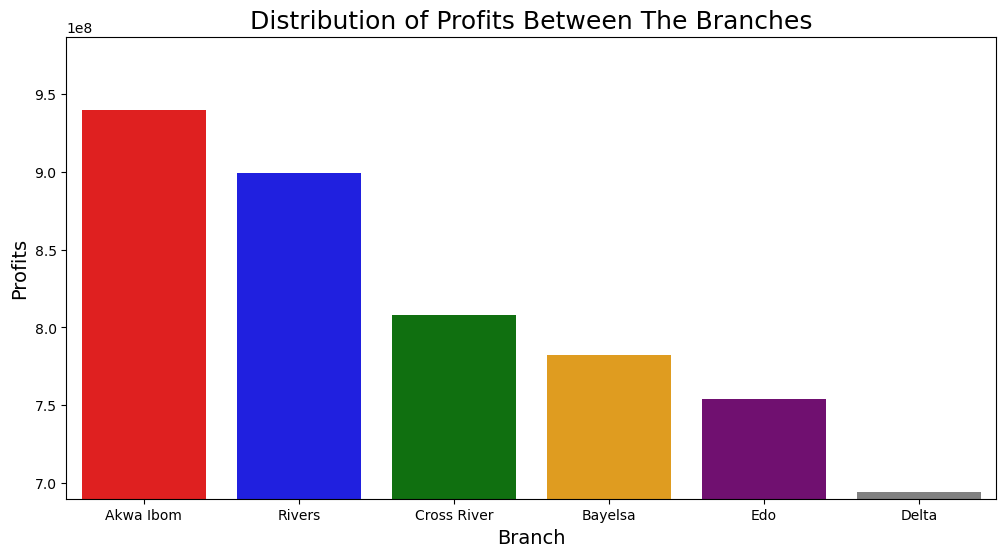

In [28]:
# Visualization
plt.figure(figsize = (12, 6))
sns.barplot(x = branch_profit["Branch"], y = branch_profit["Profits"], hue = branch_profit["Branch"], palette = ["Red", "blue", "green", "orange", "purple", "gray"])
plt.title("Distribution of Profits Between The Branches", fontsize = 18)
plt.xlabel("Branch", fontsize = 14)
plt.ylabel("Profits", fontsize = 14)
plt.ylim(690000000)
plt.show()

In [31]:
# Extracting the columns I need
branch_profits_years = expenses_revenue_full[["Branch", "Year", "Profits"]]

# Sorting by Profits
branch_profits_years = branch_profits_years.sort_values("Year", ascending = True)

# preview of the output
branch_profits_years.head()

,Branch,Year,Profits
0,Akwa Ibom,2020,245782934
1,Edo,2020,176994484
2,Delta,2020,184991672
3,Bayelsa,2020,197010020
4,Cross River,2020,210058684


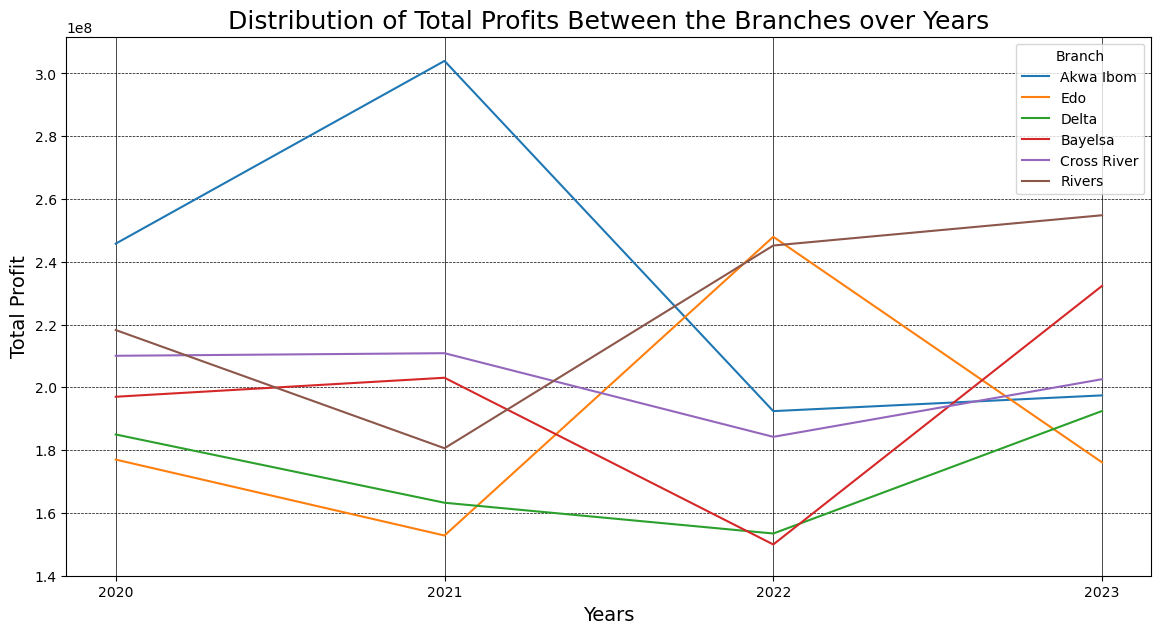

In [55]:
# Visualization
plt.figure(figsize = (14, 7))
#sns.barplot(x = branch_profits_years["Year"], y = branch_profits_years["Profits"], hue = branch_profits_years["Branch"])
sns.lineplot(x = branch_profits_years["Year"], y = branch_profits_years["Profits"], hue = branch_profits_years["Branch"])
plt.title("Distribution of Total Profits Between the Branches over Years", fontsize =18)
plt.xlabel("Years", fontsize = 14)
plt.ylabel("Total Profit", fontsize = 14)
plt.ylim(140000000)
plt.grid(axis = "y", linewidth = "0.5", linestyle= "--", color="black")
plt.grid(axis = "x", linewidth = "0.5", color = "black")
plt.show()

##### Percentage Changes in Revenue over Years

In [37]:
# Calculating the percentage Change
expenses_revenue_full["Percentage Change in Revenue"] = expenses_revenue_full.groupby(["Branch"])["Amount_Revenue"].pct_change().fillna(0) * 100

# preview of the output
expenses_revenue_full.head(10)

,Branch,Year,Category_Revenue,Amount_Revenue,Category_Expenses,Amount_Expenses,Profits,Percentage Change in Revenue
0,Akwa Ibom,2020,Revenue,450254523,Expenses,204471589,245782934,0.000000
1,Edo,2020,Revenue,384949741,Expenses,207955257,176994484,0.000000
2,Delta,2020,Revenue,404236765,Expenses,219245093,184991672,0.000000
3,Bayelsa,2020,Revenue,400516930,Expenses,203506910,197010020,0.000000
4,Cross River,2020,Revenue,408446507,Expenses,198387823,210058684,0.000000
5,Rivers,2020,Revenue,420936826,Expenses,202673449,218263377,0.000000
6,Delta,2021,Revenue,381377834,Expenses,218129806,163248028,-5.654837
7,Edo,2021,Revenue,343167397,Expenses,190360056,152807341,-10.853974
8,Cross River,2021,Revenue,423255484,Expenses,212369715,210885769,3.625683
9,Bayelsa,2021,Revenue,378733475,Expenses,175669103,203064372,-5.438835


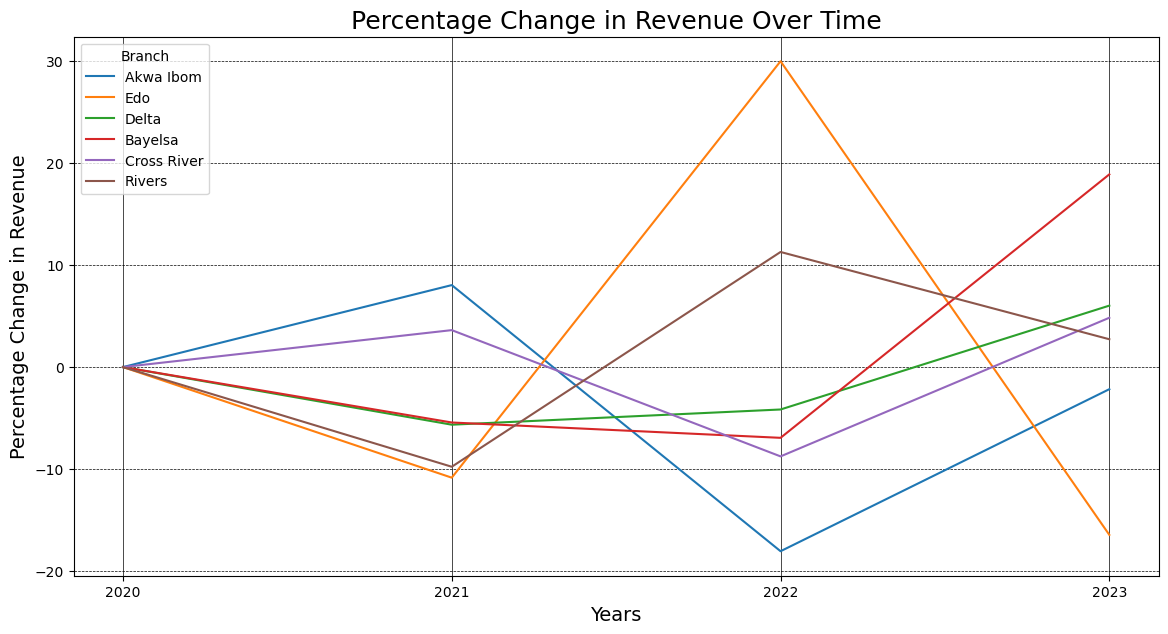

In [56]:
# Visualization
plt.figure(figsize = (14, 7))
sns.lineplot(x= expenses_revenue_full["Year"], y = expenses_revenue_full["Percentage Change in Revenue"], hue = expenses_revenue_full["Branch"])
plt.title("Percentage Change in Revenue Over Time", fontsize = 18)
plt.xlabel("Years", fontsize = 14)
plt.ylabel("Percentage Change in Revenue", fontsize = 14)
plt.grid(axis = "y", linewidth = "0.5", linestyle= "--", color="black")
plt.grid(axis = "x", linewidth = "0.5", color = "black")
plt.show()

##### Percentage Change in Expenses

In [44]:
# Calculating the Percentage Change
expenses_revenue_full["Percentage Change in Expenses"] = expenses_revenue_full.groupby("Branch")["Amount_Expenses"].pct_change().fillna(0) * 100

# Preview of the output
expenses_revenue_full.head(10)

,Branch,Year,Category_Revenue,Amount_Revenue,Category_Expenses,Amount_Expenses,Profits,Percentage Change in Revenue,Percentage Change in Expenses
0,Akwa Ibom,2020,Revenue,450254523,Expenses,204471589,245782934,0.000000,0.000000
1,Edo,2020,Revenue,384949741,Expenses,207955257,176994484,0.000000,0.000000
2,Delta,2020,Revenue,404236765,Expenses,219245093,184991672,0.000000,0.000000
3,Bayelsa,2020,Revenue,400516930,Expenses,203506910,197010020,0.000000,0.000000
4,Cross River,2020,Revenue,408446507,Expenses,198387823,210058684,0.000000,0.000000
5,Rivers,2020,Revenue,420936826,Expenses,202673449,218263377,0.000000,0.000000
6,Delta,2021,Revenue,381377834,Expenses,218129806,163248028,-5.654837,-0.508694
7,Edo,2021,Revenue,343167397,Expenses,190360056,152807341,-10.853974,-8.461051
8,Cross River,2021,Revenue,423255484,Expenses,212369715,210885769,3.625683,7.047757
9,Bayelsa,2021,Revenue,378733475,Expenses,175669103,203064372,-5.438835,-13.679048


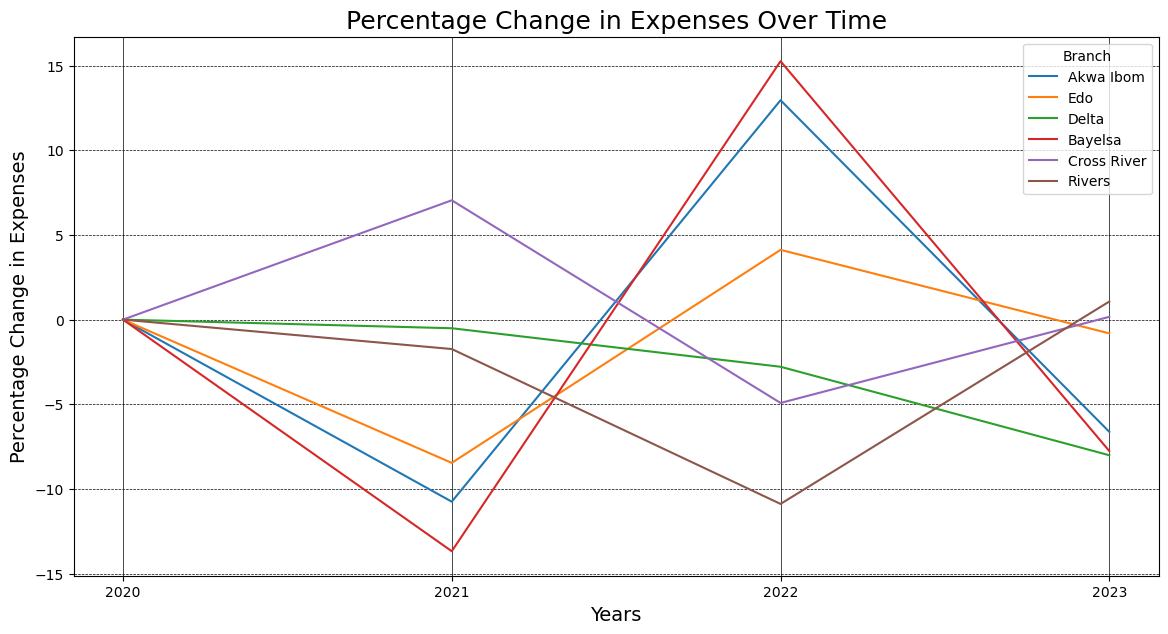

In [57]:
# Visualization
plt.figure(figsize = (14, 7))
sns.lineplot(x= expenses_revenue_full["Year"], y = expenses_revenue_full["Percentage Change in Expenses"], hue = expenses_revenue_full["Branch"])
plt.title("Percentage Change in Expenses Over Time", fontsize = 18)
plt.xlabel("Years", fontsize = 14)
plt.ylabel("Percentage Change in Expenses", fontsize = 14)
plt.grid(axis = "y", linewidth = "0.5", linestyle= "--", color="black")
plt.grid(axis = "x", linewidth = "0.5", color = "black")
plt.show()

##### Profit Margin For Each Branch

In [69]:
# Extracting the needed columns
profit_margin_branch = expenses_revenue_full[["Branch", "Amount_Revenue", "Profits"]]

# Grouping the data by Branch
profit_margin_branch = profit_margin_branch.groupby("Branch").sum().reset_index()

# Adding the profit margin column
profit_margin_branch["Profit Margin"] = ((profit_margin_branch["Profits"]/profit_margin_branch["Amount_Revenue"])*100).round(2)

# Sorting by profit margin
profit_margin_branch = profit_margin_branch.sort_values("Profit Margin", ascending =False)

# previewing the output
profit_margin_branch.head()

,Branch,Amount_Revenue,Profits,Profit Margin
0,Akwa Ibom,1725212274,939654400,54.47
5,Rivers,1657555837,898881518,54.23
1,Bayelsa,1550773882,782359781,50.45
2,Cross River,1622705919,807780554,49.78
4,Edo,1546985038,753870486,48.73


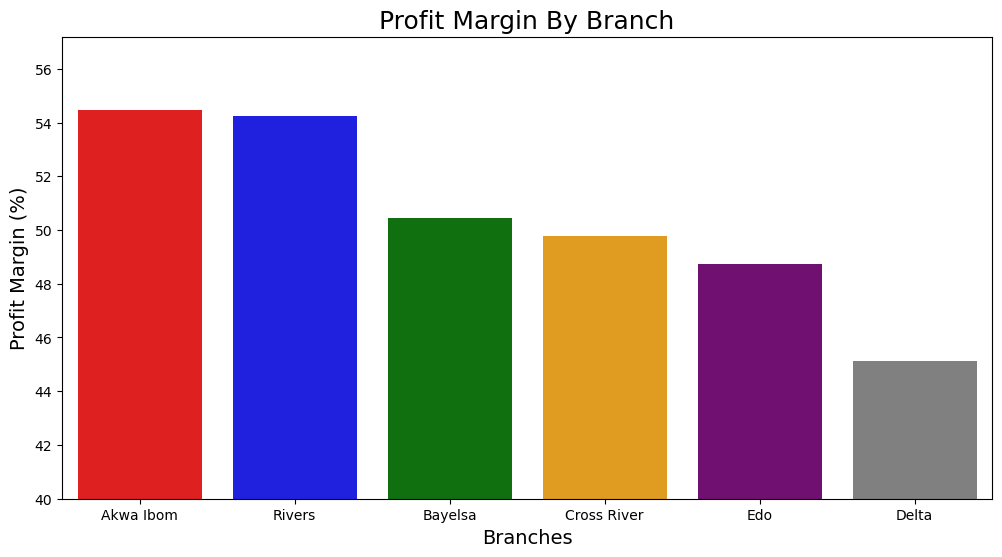

In [70]:
# Visualization 
plt.figure(figsize = (12, 6))
sns.barplot(x = profit_margin_branch["Branch"], y = profit_margin_branch["Profit Margin"], hue = profit_margin_branch["Branch"], palette = ["Red", "blue", "green", "orange", "purple", "gray"])
plt.title("Profit Margin By Branch", fontsize = 18)
plt.xlabel("Branches", fontsize =14)
plt.ylabel("Profit Margin (%)", fontsize =14)
plt.ylim(40)
plt.show()

## Insights and Recommendations

#### Insights